In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Importar Data

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/jomorales1/data-mining-project/refs/heads/master/Crime_Data_from_2020_to_Present.csv')
df.shape

(1005198, 28)

# Descripción del conjunto de datos

In [3]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\n{df[col].value_counts()}")


Date Rptd
02/02/2023 12:00:00 AM    929
02/03/2023 12:00:00 AM    927
01/03/2023 12:00:00 AM    914
05/02/2022 12:00:00 AM    909
04/04/2022 12:00:00 AM    883
                         ... 
03/15/2025 12:00:00 AM      1
03/02/2025 12:00:00 AM      1
01/18/2025 12:00:00 AM      1
02/01/2025 12:00:00 AM      1
01/25/2025 12:00:00 AM      1
Name: count, Length: 1906, dtype: int64

DATE OCC
01/01/2020 12:00:00 AM    1164
01/01/2023 12:00:00 AM    1160
12/02/2022 12:00:00 AM    1132
02/01/2023 12:00:00 AM    1093
10/01/2022 12:00:00 AM    1079
                          ... 
01/04/2025 12:00:00 AM       1
03/19/2025 12:00:00 AM       1
03/08/2025 12:00:00 AM       1
03/02/2025 12:00:00 AM       1
01/19/2025 12:00:00 AM       1
Name: count, Length: 1901, dtype: int64

AREA NAME
Central        69674
77th Street    61763
Pacific        59520
Southwest      57511
Hollywood      52430
N Hollywood    51107
Olympic        50071
Southeast      49941
Newton         49181
Wilshire       48240
Rampart

# EDA

## Proceso de aplicar el análisis exploratorio con resultados y discusiones.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,1005198.0,2.202277e+08,1.320282e+07,817.0000,2.106169e+08,2.209160e+08,2.311105e+08,2.521041e+08
TIME OCC,1005198.0,1.339911e+03,6.510531e+02,1.0000,9.000000e+02,1.420000e+03,1.900000e+03,2.359000e+03
AREA,1005198.0,1.069098e+01,6.110385e+00,1.0000,5.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,1005198.0,1.115556e+03,6.111733e+02,101.0000,5.870000e+02,1.139000e+03,1.613000e+03,2.199000e+03
Part 1-2,1005198.0,1.400283e+00,4.899559e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,1005198.0,5.001458e+02,2.052635e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,1005198.0,2.891253e+01,2.199382e+01,-4.0000,0.000000e+00,3.000000e+01,4.400000e+01,1.200000e+02
Premis Cd,1005182.0,3.056189e+02,2.193160e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.760000e+02
Weapon Used Cd,327280.0,3.639537e+02,1.237361e+02,101.0000,3.110000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,1005187.0,4.999063e+02,2.050640e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02


## Análisis temporal

/tmp/ipykernel_70/544270177.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


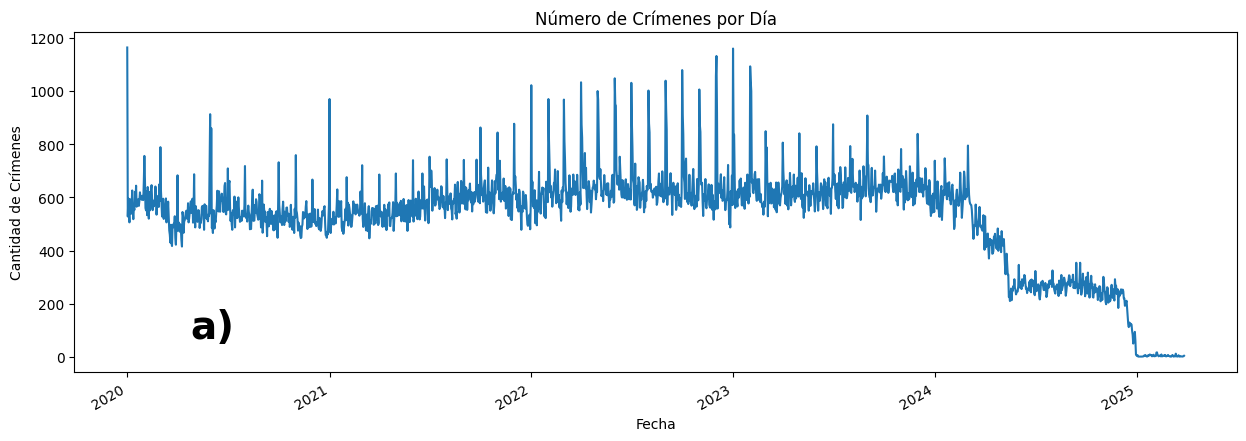

In [8]:
# Estadísticas descriptivas
#df.describe(include='all')

# Convertir la columna de fecha a tipo datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Agrupar por fecha y contar incidentes
daily_crimes = df.groupby('DATE OCC').size()

# Graficar la distribución temporal
plt.figure(figsize=(15, 5))
daily_crimes.plot()
plt.title('Número de Crímenes por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Crímenes')

# Agregar texto grande tipo "a)"
plt.text(0.1, 0.1, 'a)', transform=plt.gca().transAxes,
         fontsize=28, fontweight='bold')
plt.show()

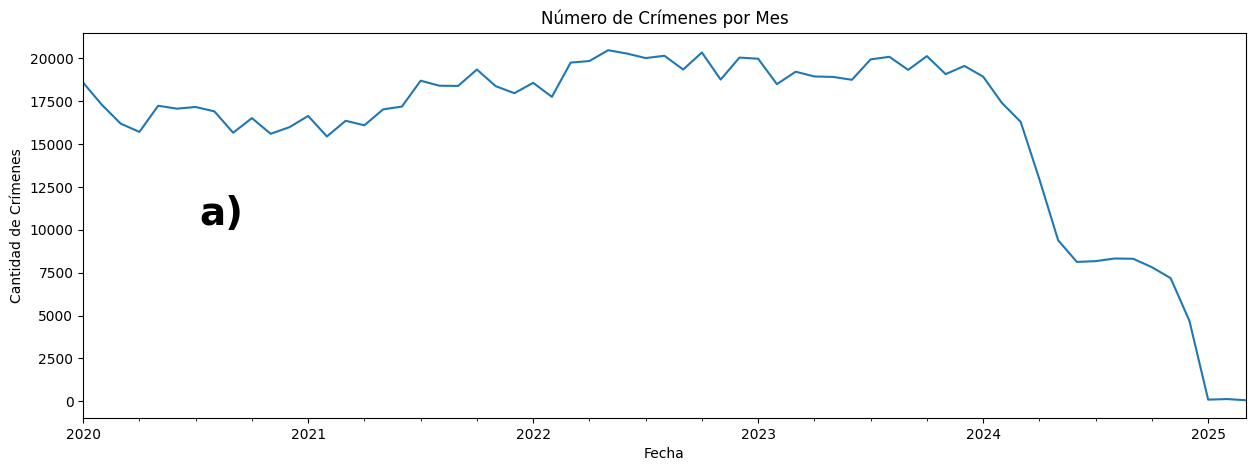

In [9]:
df['MONTH OCC'] = df['DATE OCC'].dt.to_period('M')

# Agrupar por fecha y contar incidentes
mes_crimes = df.groupby('MONTH OCC').size()

# Graficar la distribución temporal
plt.figure(figsize=(15, 5))
mes_crimes.plot()
plt.title('Número de Crímenes por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Crímenes')

# Agregar texto grande tipo "a)"
plt.text(0.1, 0.5, 'a)', transform=plt.gca().transAxes,
         fontsize=28, fontweight='bold')

plt.show()

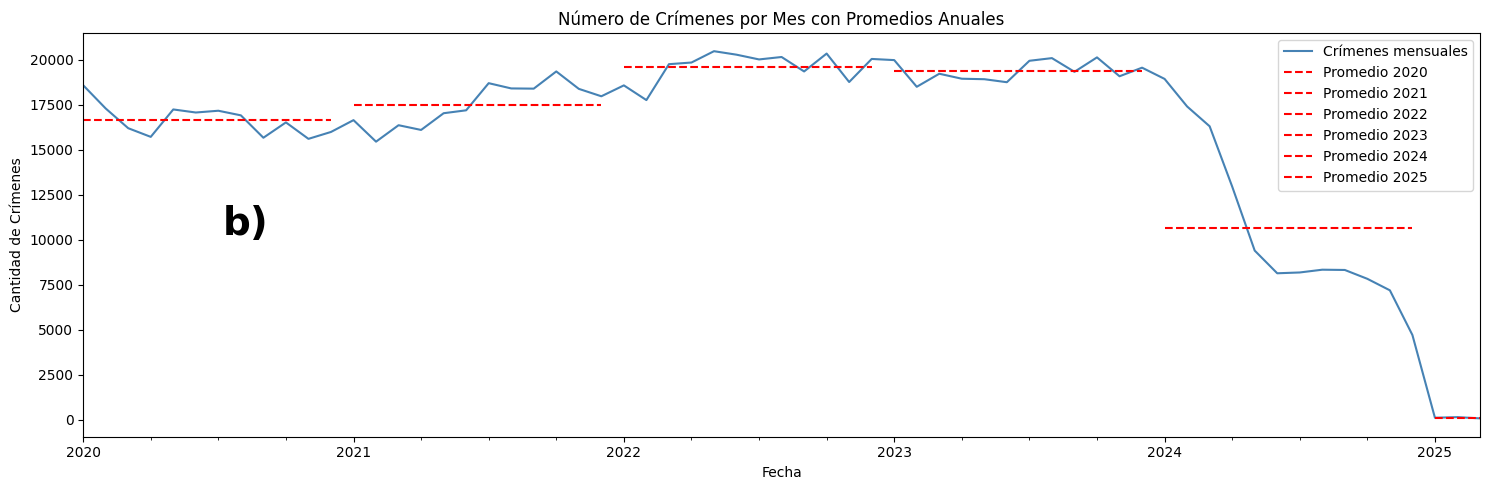

In [10]:
df['YEAR OCC'] = df['DATE OCC'].dt.year

# Calcular el promedio anual
promedios_anuales = df.groupby('YEAR OCC').size() / df['YEAR OCC'].value_counts().sort_index().count()

# Graficar crímenes por mes
plt.figure(figsize=(15, 5))
mes_crimes.plot(label='Crímenes mensuales', color='steelblue')

# Agregar línea horizontal del promedio anual para cada año
for year in sorted(df['YEAR OCC'].unique()):
    # Obtener el rango de meses de ese año
    start = pd.Period(f'{year}-01', freq='M')
    end = pd.Period(f'{year}-12', freq='M')

    # Filtrar los meses disponibles en el rango
    meses_del_año = mes_crimes.loc[(mes_crimes.index >= start) & (mes_crimes.index <= end)]

    if not meses_del_año.empty:
        promedio = meses_del_año.mean()
        plt.hlines(promedio, xmin=meses_del_año.index[0].start_time, xmax=meses_del_año.index[-1].start_time,
                   colors='red', linestyles='dashed', label=f'Promedio {year}')


plt.title('Número de Crímenes por Mes con Promedios Anuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Crímenes')
plt.legend(loc='upper right')
plt.tight_layout()

plt.text(0.1, 0.5, 'b)', transform=plt.gca().transAxes,
         fontsize=28, fontweight='bold')

plt.show()

In [11]:
df['Date Rptd']=pd.to_datetime(df['Date Rptd'])
df['Hour Rptd'] = df['Date Rptd'].dt.hour
df['Hour OCC'] = df['DATE OCC'].dt.hour

/tmp/ipykernel_70/854359482.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd']=pd.to_datetime(df['Date Rptd'])


In [12]:
df['Hour Rptd'].value_counts()

Hour Rptd
0    1005198
Name: count, dtype: int64

In [13]:
df['Hour OCC'].value_counts()

Hour OCC
0    1005198
Name: count, dtype: int64

## Análisis entre dias de ocurrencia y reporte

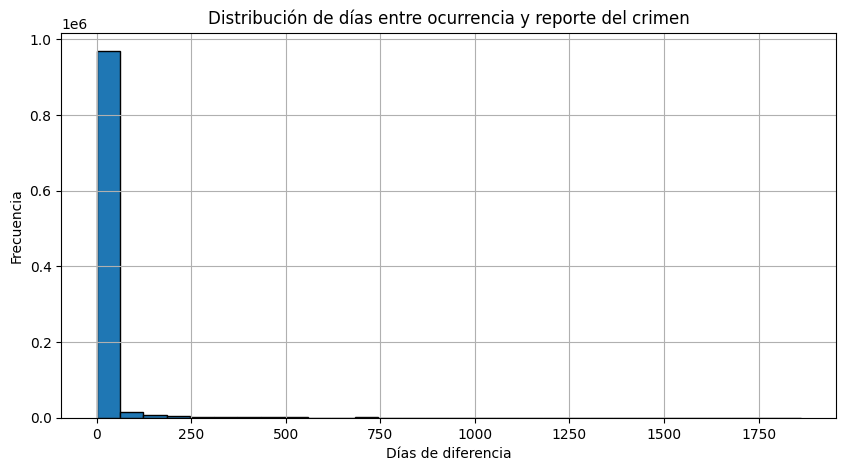

In [14]:
df['Diff_reporte_ocurrencia']=(df['Date Rptd'] -df['DATE OCC']).dt.days

df['Diff_reporte_ocurrencia'].hist(bins=30, figsize=(10, 5), edgecolor='black')
plt.title('Distribución de días entre ocurrencia y reporte del crimen')
plt.xlabel('Días de diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [15]:
df['Diff_reporte_ocurrencia'].describe()

count    1.005198e+06
mean     1.217384e+01
std      6.914721e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.862000e+03
Name: Diff_reporte_ocurrencia, dtype: float64

In [16]:
df['Diff_reporte_ocurrencia'].quantile(0.8)

3.0

In [17]:
df['Diff_reporte_ocurrencia'].quantile(0.95)

38.0

In [18]:
percentil_30 = (df['Diff_reporte_ocurrencia'] <= 30).mean() * 100
print(f"El valor 30 está en el percentil aproximadamente: {percentil_30:.2f}")

El valor 30 está en el percentil aproximadamente: 94.13


In [19]:
df[df['Diff_reporte_ocurrencia'] > 38]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,MONTH OCC,YEAR OCC,Hour Rptd,Hour OCC,Diff_reporte_ocurrencia
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03,2020,0,0,1156
72,200117110,2020-08-28,2020-05-01,100,1,Central,154,1,121,"RAPE, FORCIBLE",...,NaN,500 S MAIN ST,NaN,34.0465,-118.2488,2020-05,2020,0,0,119
100,200410047,2020-06-22,2020-02-01,1,4,Hollenbeck,429,1,510,VEHICLE - STOLEN,...,NaN,5400 SHELLEY ST,NaN,34.0912,-118.1624,2020-02,2020,0,0,142
106,200214497,2020-09-01,2020-06-13,1340,2,Rampart,248,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",...,NaN,1300 W 6TH ST,NaN,34.0579,-118.2649,2020-06,2020,0,0,80
152,201215770,2020-07-01,2020-03-01,700,12,77th Street,1204,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,NaN,1400 W 45TH ST,NaN,34.0028,-118.3007,2020-03,2020,0,0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004861,240611587,2024-09-02,2024-01-02,1340,6,Hollywood,636,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,6700 FRANKLIN PL,NaN,34.1042,-118.3362,2024-01,2024,0,0,244
1004874,241712978,2024-09-20,2024-05-19,1000,17,Devonshire,1757,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,16900 DEVONSHIRE ST,NaN,34.2575,-118.5004,2024-05,2024,0,0,124
1005012,250504252,2025-03-25,2025-01-21,128,5,Harbor,527,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,NaN,600 W HARRY BRIDGE BL,NaN,33.7626,-118.2687,2025-01,2025,0,0,63
1005040,250504230,2025-03-10,2025-01-04,1200,5,Harbor,559,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,NaN,600 TERMINAL WY,NaN,33.7430,-118.2625,2025-01,2025,0,0,65


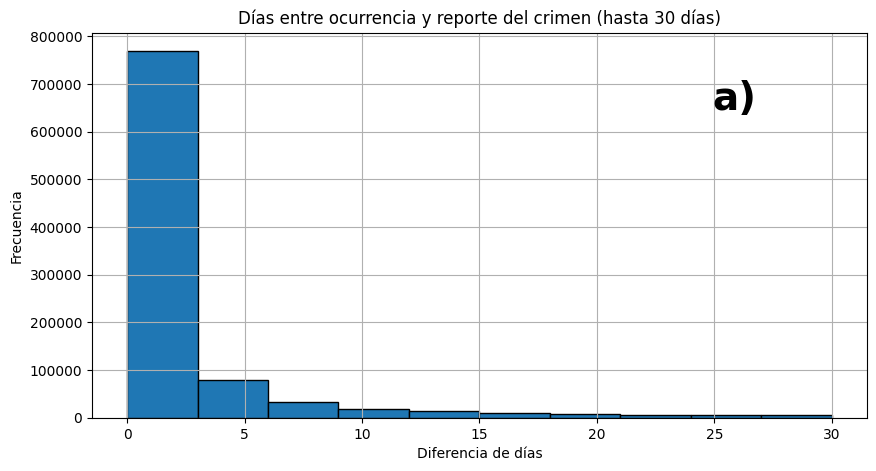

In [20]:
# Filtrar los valores para eliminar outliers (por ejemplo, solo mostrar <= 30 días)
filtro = df[df['Diff_reporte_ocurrencia'] <= 30]

plt.figure(figsize=(10, 5))
plt.hist(filtro['Diff_reporte_ocurrencia'], bins=10, edgecolor='black')
plt.title('Días entre ocurrencia y reporte del crimen (hasta 30 días)')
plt.xlabel('Diferencia de días')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar texto grande tipo "a)"
plt.text(0.8, 0.8, 'a)', transform=plt.gca().transAxes,
         fontsize=28, fontweight='bold')
plt.show()

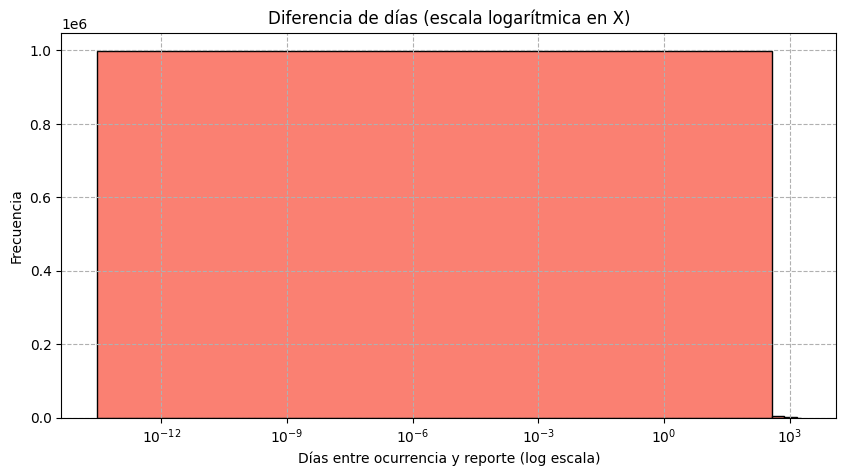

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(df['Diff_reporte_ocurrencia'], bins=5, edgecolor='black', color='salmon', log=False)
plt.xscale('log')
plt.title('Diferencia de días (escala logarítmica en X)')
plt.xlabel('Días entre ocurrencia y reporte (log escala)')
plt.ylabel('Frecuencia')
plt.grid(True, which="both", ls="--")
plt.show()

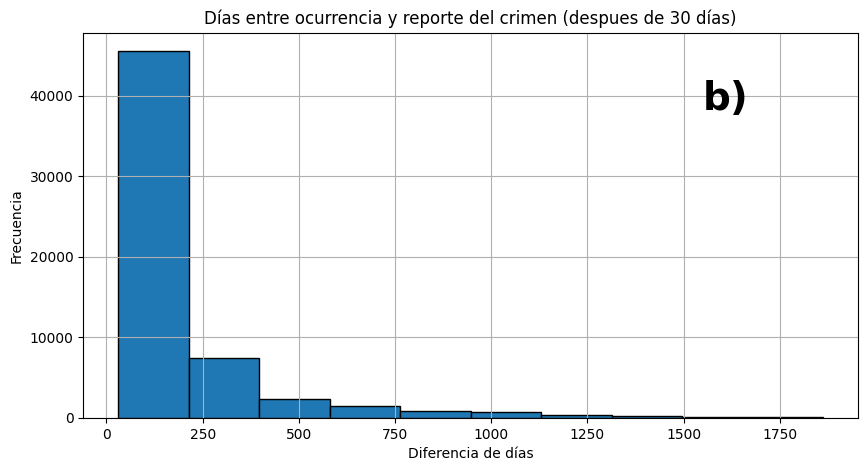

In [22]:
# Filtrar los valores para eliminar outliers (por ejemplo, solo mostrar <= 30 días)
filtro = df[df['Diff_reporte_ocurrencia'] > 30]

plt.figure(figsize=(10, 5))
plt.hist(filtro['Diff_reporte_ocurrencia'], bins=10, edgecolor='black')
plt.title('Días entre ocurrencia y reporte del crimen (despues de 30 días)')
plt.xlabel('Diferencia de días')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar texto grande tipo "a)"
plt.text(0.8, 0.8, 'b)', transform=plt.gca().transAxes,
         fontsize=28, fontweight='bold')
plt.show()

## Tipos de crímenes

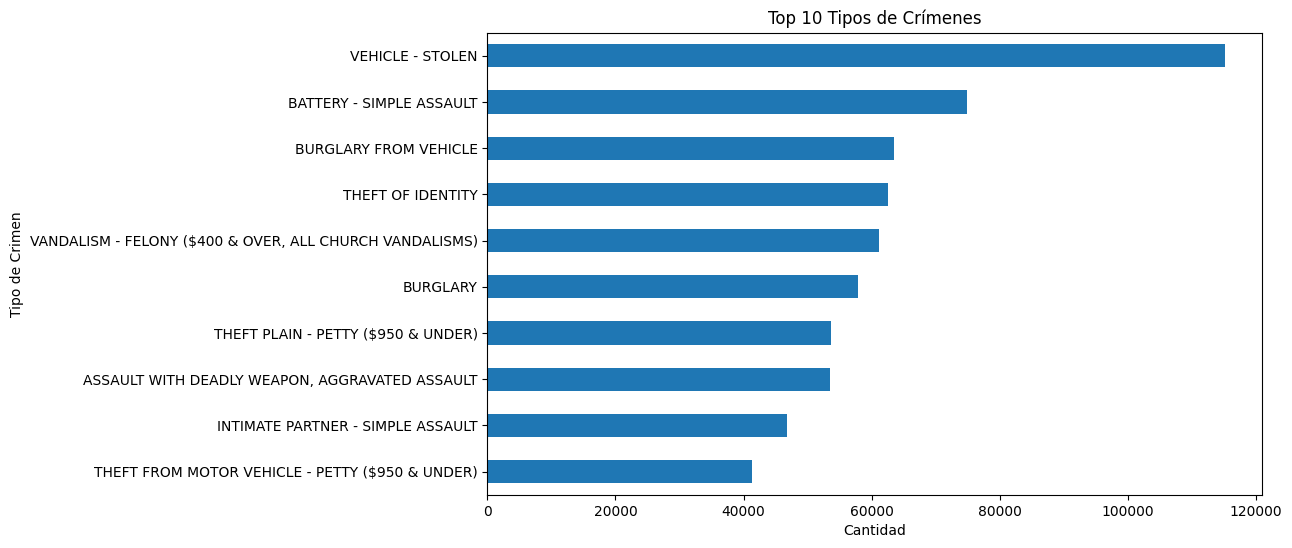

In [23]:
# Contar la frecuencia de cada tipo de crimen
crime_counts = df['Crm Cd Desc'].value_counts().head(10)

# Graficar los resultados
crime_counts.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Tipos de Crímenes')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Crimen')
plt.gca().invert_yaxis()
plt.show()

## Distritos o comisarias

In [24]:
df['Rpt Dist No'].value_counts()

Rpt Dist No
162     5403
1494    5371
645     5025
182     4896
646     4426
        ... 
225        1
1053       1
1087       1
917        1
902        1
Name: count, Length: 1210, dtype: int64

In [25]:
df['AREA NAME'].value_counts()

AREA NAME
Central        69674
77th Street    61763
Pacific        59520
Southwest      57511
Hollywood      52430
N Hollywood    51107
Olympic        50071
Southeast      49941
Newton         49181
Wilshire       48240
Rampart        46826
West LA        45731
Northeast      42962
Van Nuys       42883
West Valley    42158
Devonshire     41766
Harbor         41462
Topanga        41376
Mission        40365
Hollenbeck     37095
Foothill       33136
Name: count, dtype: int64

In [26]:
df['AREA NAME'].nunique()

21

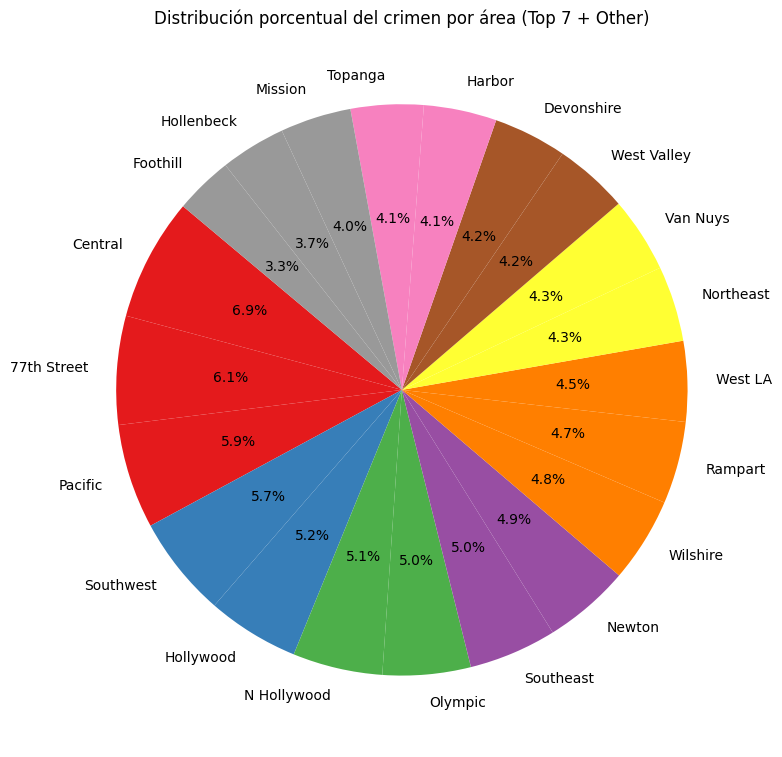

In [27]:
# Contar la frecuencia de cada área
area_counts = df['AREA NAME'].value_counts()

# Seleccionar Top 7 y agrupar el resto como 'Other'
top7 = area_counts.head(21)
#others = pd.Series({'Other': area_counts.iloc[21:].sum()})

# Combinar usando pd.concat()
pie_data =top7# pd.concat([top7, others])

# Graficar
plt.figure(figsize=(8, 8))
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set1')
plt.title('Distribución porcentual del crimen por área (Top 7 + Other)')
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.tight_layout()
plt.show()

In [28]:
area_counts = df['AREA NAME'].value_counts().reset_index()
area_counts.columns = ['AREA NAME', 'COUNT']

# 2. Coordenadas promedio por área para mostrar solo un burbuja por area
area_coords = df.groupby('AREA NAME')[['LAT', 'LON']].mean().reset_index()

# 3. Unir datos
area_info = pd.merge(area_counts, area_coords, on='AREA NAME')

# 4. Ordenar por frecuencia
area_info = area_info.sort_values('COUNT', ascending=False).reset_index(drop=True)

# 5. Asignar color por rango para verlo visualmente
def asignar_color(rank):
    if rank < 5:
        return 'red'
    elif rank < 10:
        return 'orange'
    elif rank < 15:
        return 'yellow'
    else:
        return 'green'

area_info['COLOR'] = area_info.index.map(asignar_color)

# 6. Crear mapa base
mapa = folium.Map(location=[34.05, -118.25], zoom_start=10, tiles='CartoDB positron')

# 7. Añadir círculos con colores por rango
for _, row in area_info.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['COUNT']**0.5 / 10,
        color=row['COLOR'],
        fill=True,
        fill_color=row['COLOR'],
        fill_opacity=0.7,
        popup=f"{row['AREA NAME']}: {row['COUNT']} crímenes"
    ).add_to(mapa)

# 8. Mostrar el mapa
mapa

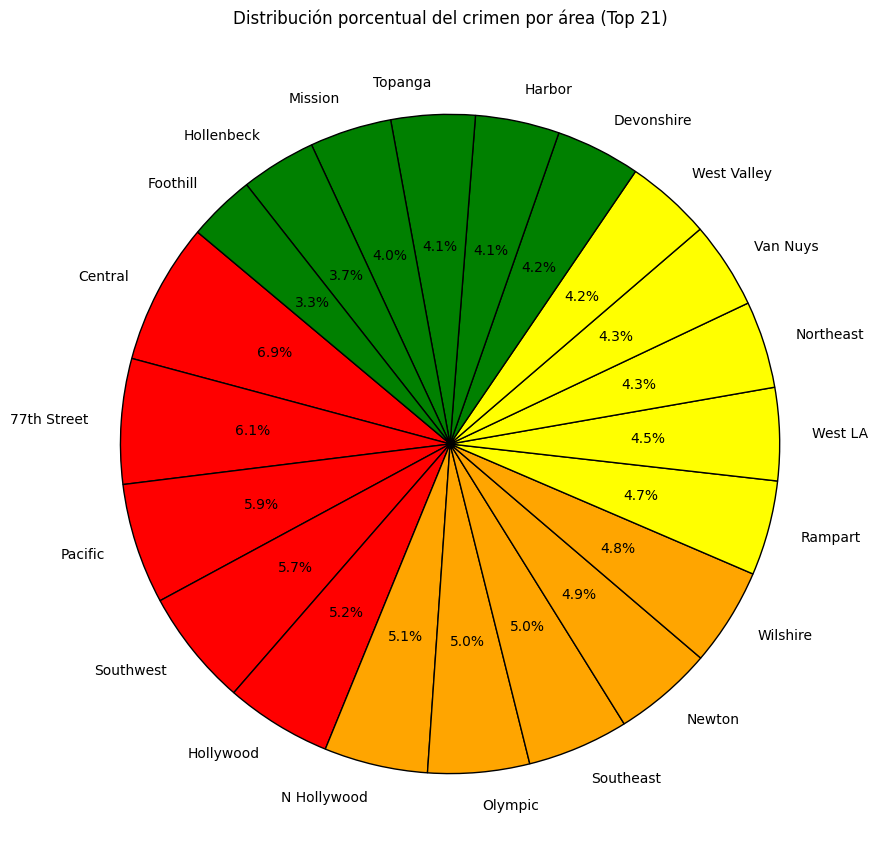

In [29]:
area_counts = df['AREA NAME'].value_counts()
top_areas = area_counts.head(21)

# Colores para top 21
colors = ['red']*5 + ['orange']*5 + ['yellow']*5 + ['green']*(len(top_areas)-15)

# Graficar pie (funciona sobre Series sin 'y' ni 'subplots')
plt.figure(figsize=(9, 9))
top_areas.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución porcentual del crimen por área (Top 21)')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Armas

In [30]:
df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174777
UNKNOWN WEAPON/OTHER WEAPON                        36394
VERBAL THREAT                                      23848
HAND GUN                                           20186
SEMI-AUTOMATIC PISTOL                               7267
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [31]:
df['Weapon Used Cd'].value_counts()

Weapon Used Cd
400.0    174777
500.0     36394
511.0     23848
102.0     20186
109.0      7267
          ...  
120.0         3
119.0         2
121.0         2
124.0         2
123.0         1
Name: count, Length: 79, dtype: int64

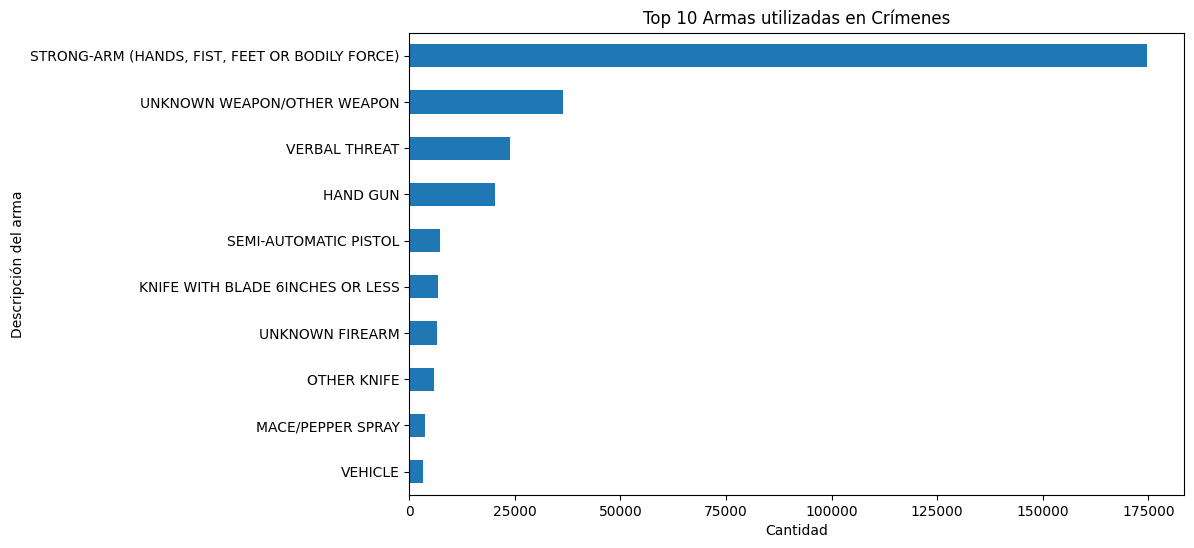

In [32]:
# Contar la frecuencia de cada tipo de crimen
weapons_counts = df['Weapon Desc'].value_counts().head(10)

# Graficar los resultados
weapons_counts.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Armas utilizadas en Crímenes')
plt.xlabel('Cantidad')
plt.ylabel('Descripción del arma')
plt.gca().invert_yaxis()
plt.show()

<AxesSubplot: xlabel='Vict Sex'>

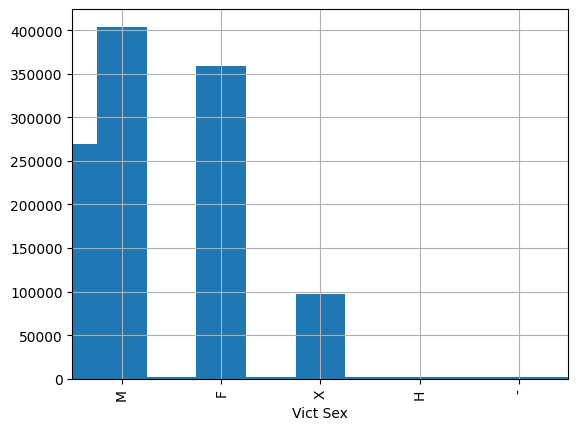

In [33]:
df['Vict Sex'].value_counts().plot(kind='bar')
df['Vict Age'].hist(bins=30)


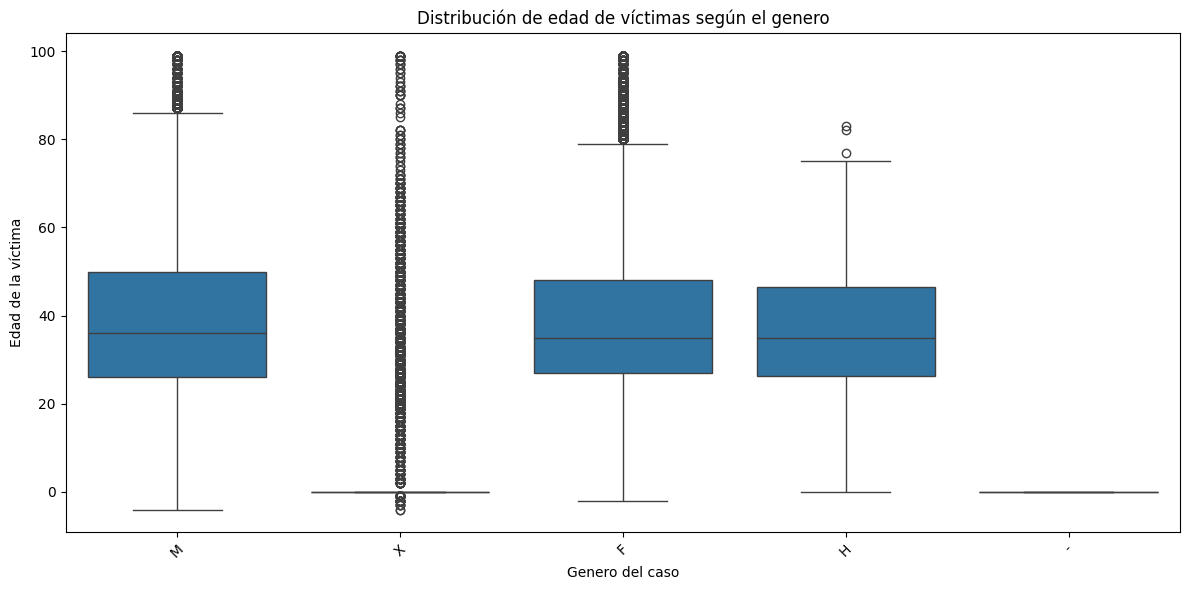

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vict Sex', y='Vict Age', data=df)
plt.title('Distribución de edad de víctimas según el genero')
plt.xlabel('Genero del caso')
plt.ylabel('Edad de la víctima')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df.groupby('Vict Sex')['Vict Age'].describe().reset_index()

,Vict Sex,count,mean,std,min,25%,50%,75%,max
0,-,1.0,0.000000,NaN,0.0,0.00,0.0,0.0,0.0
1,F,358599.0,38.291947,16.049900,-2.0,27.00,35.0,48.0,99.0
2,H,114.0,37.456140,15.843896,0.0,26.25,35.0,46.5,83.0
3,M,403916.0,37.308265,18.524489,-4.0,26.00,36.0,50.0,99.0
4,X,97786.0,2.624343,8.223111,-4.0,0.00,0.0,0.0,99.0


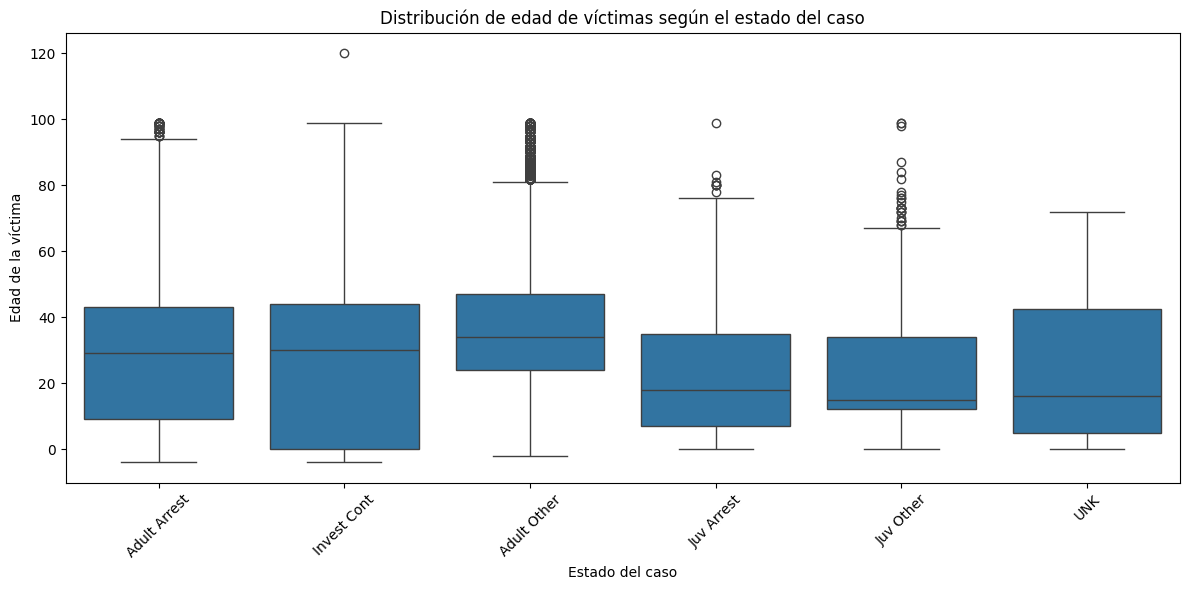

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Status Desc', y='Vict Age', data=df)
plt.title('Distribución de edad de víctimas según el estado del caso')
plt.xlabel('Estado del caso')
plt.ylabel('Edad de la víctima')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
df.groupby('Status Desc')['Vict Age'].describe().reset_index()

,Status Desc,count,mean,std,min,25%,50%,75%,max
0,Adult Arrest,86877.0,28.717060,21.131713,-4.0,9.0,29.0,43.0,99.0
1,Adult Other,109255.0,34.883474,18.252355,-2.0,24.0,34.0,47.0,99.0
2,Invest Cont,803946.0,28.166873,22.437662,-4.0,0.0,30.0,44.0,120.0
3,Juv Arrest,3249.0,22.251154,18.516627,0.0,7.0,18.0,35.0,99.0
4,Juv Other,1864.0,21.270923,17.766364,0.0,12.0,15.0,34.0,99.0
5,UNK,7.0,26.142857,27.931038,0.0,5.0,16.0,42.5,72.0


In [38]:
# Verificar valores faltantes
missing_values = df.isnull().sum()

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['LAT', 'LON', 'Vict Age'])

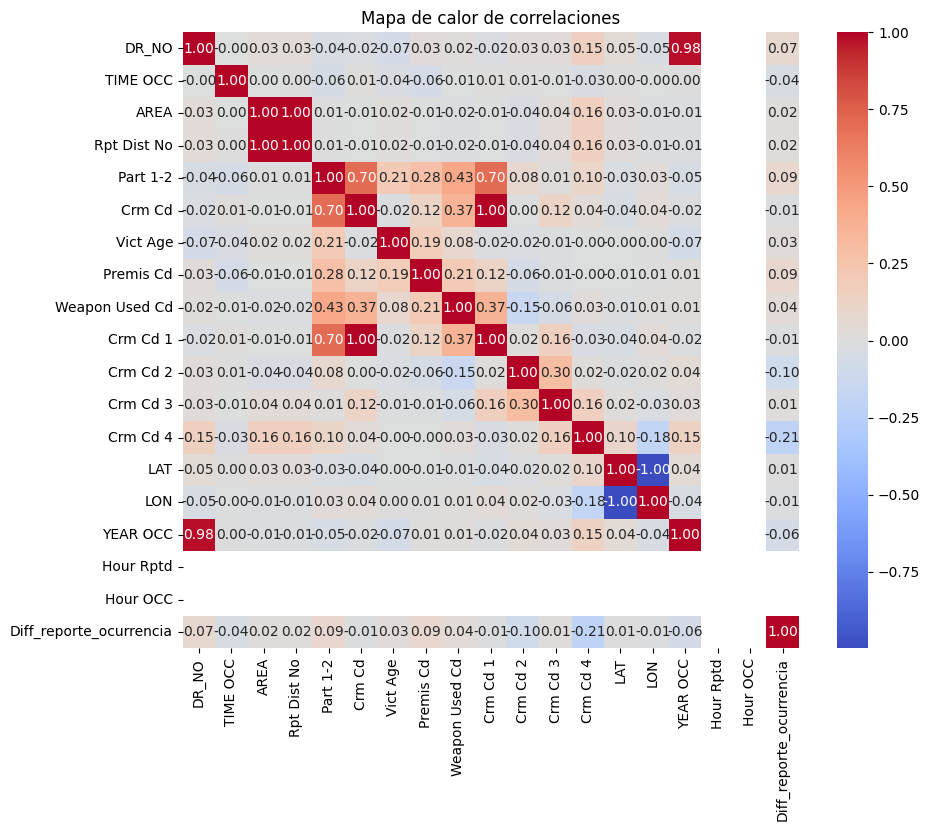

In [39]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular matriz de correlación
corr = numeric_df.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de calor de correlaciones')
plt.show()


## Proceso de aplicar preprocesamiento:

In [40]:
# Eliminar columnas con demasiados nulos o sin utilidad
columns_to_remove = [
    'MO Codes', 'Weapon Used Cd', 'Weapon Desc',
    'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', "Status Desc"
]
df = df.drop(columns=columns_to_remove, errors='ignore')

In [41]:
# Número de filas antes de eliminar duplicados
filas_antes = df.shape[0]

# Eliminar duplicados
df = df.drop_duplicates()

# Número de filas después
filas_despues = df.shape[0]

# Número de duplicados eliminados
duplicados_eliminados = filas_antes - filas_despues

# Imprimir resultados
print("Filas antes de eliminar duplicados:", filas_antes)
print("Filas después de eliminar duplicados:", filas_despues)
print("Duplicados eliminados:", duplicados_eliminados)

Filas antes de eliminar duplicados: 1005198
Filas después de eliminar duplicados: 1005198
Duplicados eliminados: 0


In [42]:
# Reemplazar valores faltantes
df['Vict Sex'] = df['Vict Sex'].fillna(df['Vict Sex'].mode()[0])
df['Vict Descent'] = df['Vict Descent'].fillna(df['Vict Descent'].mode()[0])
df['Mocodes'] = df['Mocodes'].fillna('0000')
df['LAT'] = df['LAT'].fillna(df['LAT'].median())
df['LON'] = df['LON'].fillna(df['LON'].median())
df['Premis Cd'] = df['Premis Cd'].fillna(df['Premis Cd'].mode()[0])
df['Premis Desc'] = df['Premis Desc'].fillna(df['Premis Desc'].mode()[0])
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0])

In [43]:
# Transformación de variables

# Convertir columnas temporales
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['hour'] = df['TIME OCC'] // 100  # simplifica de HHMM a hora
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Crear rangos de horas (igual amplitud)
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
df['franja_horaria'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

# Agrupar latitud (igual frecuencia)
df['zona_latitud'] = pd.qcut(df['LAT'], q=4, labels=['Z1', 'Z2', 'Z3', 'Z4'])

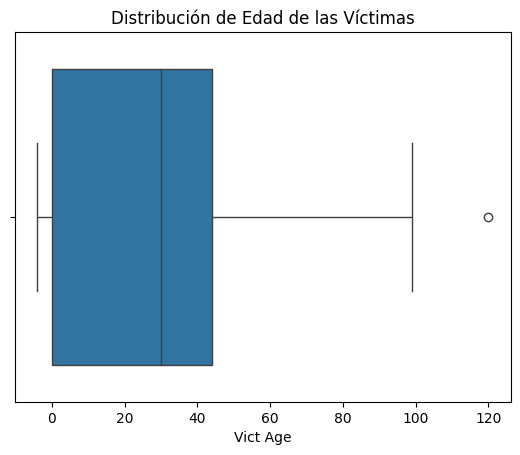

In [44]:
import seaborn as sns

# Boxplot para visualizar outliers en la edad de las víctimas
sns.boxplot(x=df['Vict Age'])
plt.title('Distribución de Edad de las Víctimas')
plt.show()

In [45]:
# Filtrar edades fuera de un rango razonable (por ejemplo, 0 a 100 años)
df = df[(df['Vict Age'] >= 0) & (df['Vict Age'] <= 100)]

# Definir los rangos de edad
bins = [0, 17, 30, 45, 60, 100]
labels = ['Menor de Edad', 'Joven Adulto', 'Adulto', 'Adulto Mayor', 'Anciano']

# Crear una nueva columna con las categorías de edad
df['Grupo Edad'] = pd.cut(df['Vict Age'], bins=bins, labels=labels)

In [46]:
# Codificar la columna 'Grupo Edad'
df = pd.get_dummies(df, columns=['Grupo Edad'], prefix='Edad')

In [47]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'MONTH OCC', 'YEAR OCC',
       'Hour Rptd', 'Hour OCC', 'Diff_reporte_ocurrencia', 'year', 'month',
       'hour', 'franja_horaria', 'zona_latitud', 'Edad_Menor de Edad',
       'Edad_Joven Adulto', 'Edad_Adulto', 'Edad_Adulto Mayor',
       'Edad_Anciano'],
      dtype='object')

In [48]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

# Codificar y guardar los codificadores
columns = ['Vict Sex', 'Vict Descent', 'AREA NAME', 'Crm Cd Desc', 'Premis Desc']
label_encoders = {}
for col in columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(df[columns].head(5))

  Vict Sex Vict Descent   AREA NAME                               Crm Cd Desc  \
0        M            O    Wilshire                          VEHICLE - STOLEN   
1        M            O     Central                     BURGLARY FROM VEHICLE   
2        X            X   Southwest                             BIKE - STOLEN   
3        M            O    Van Nuys  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4        M            H  Hollenbeck                          VEHICLE - STOLEN   

                                    Premis Desc  
0                                        STREET  
1             BUS STOP/LAYOVER (ALSO QUERY 124)  
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  
3                                CLOTHING STORE  
4                                        STREET  


In [49]:
# Normalizar los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['LAT', 'LON', 'hour']] = scaler.fit_transform(df[['LAT', 'LON', 'hour']])

print(df[['LAT', 'LON', 'hour']].head(10))

        LAT       LON      hour
0  0.991356  0.002671  0.913043
1  0.991557  0.003411  0.782609
2  0.990875  0.003096  0.739130
3  0.994854  0.001929  0.869565
4  0.992652  0.003831  0.260870
5  0.992133  0.003291  0.782609
6  0.991825  0.003276  0.565217
7  0.990759  0.003399  0.521739
8  0.993039  0.003120  0.869565
9  0.992331  0.003686  1.000000


In [50]:
# Exportar el dataset a un archivo CSV
df.to_csv('preprocessed_dataset.csv', index=False)

## Aplicación de PCA

Index(['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON'],
      dtype='object')


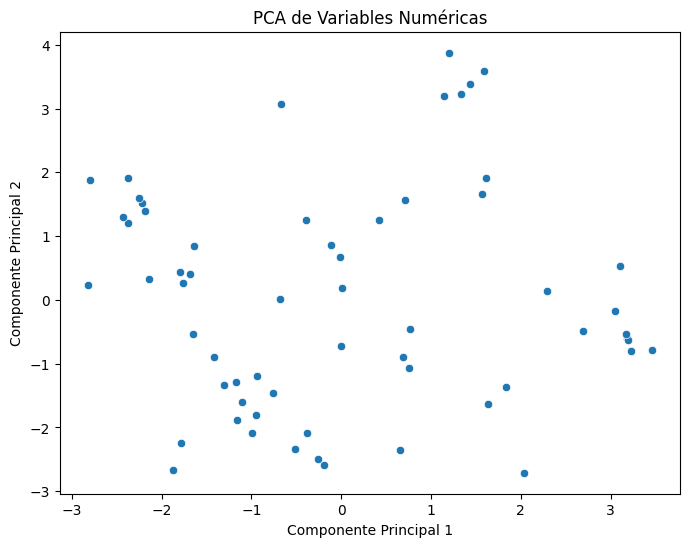

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://media.githubusercontent.com/media/jomorales1/data-mining-project/refs/heads/master/Crime_Data_from_2020_to_Present.csv')

# Seleccionar columnas numéricas para PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)
X = df[numeric_cols].dropna()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=columns)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA de Variables Numéricas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [65]:
print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total acumulada:", sum(pca.explained_variance_ratio_))

Número de componentes seleccionados: 11
Varianza explicada por cada componente: [0.21589542 0.19746017 0.10825717 0.09179235 0.07166832 0.06428969
 0.05388543 0.04895766 0.04013904 0.03496191 0.03078958]
Varianza total acumulada: 0.9580967505717721


In [68]:
# Exportar el dataset a un archivo CSV
pca_df.to_csv('pca_dataset.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6e03b1cd-ef75-4b3a-ac71-f728cfda1c34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>